In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import ruptures as rpt
from sklearn.cluster import KMeans

In [129]:
data = pd.read_csv("cholesterol.csv")
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


# Opis danych
https://www.openml.org/d/204

Zbiór ten jest o tyle fajny, że są w nim zarówno zmienne ciągłe jak i kategoryczne. Zmienną, którą będziemy starali się przewidzieć jest poziom cholesterolu (`chol`).

In [130]:
data.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,564.000000


In [131]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
chol        152
dtype: int64

In [132]:
data["thal"] = pd.to_numeric(data.thal, errors="coerce")
data["ca"] = pd.to_numeric(data.ca, errors="coerce")
data = data.dropna()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null float64
thal        297 non-null float64
num         297 non-null int64
chol        297 non-null int64
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [133]:
categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "num"]
for name in categorical:
    data[name] = pd.Categorical(data[name])

In [134]:
data.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0.0,6.0,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3.0,3.0,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2.0,7.0,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0.0,3.0,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0.0,3.0,0,204


# Modele

In [135]:
data["thal"] = pd.to_numeric(data.thal, errors="coerce")
data["ca"] = pd.to_numeric(data.ca, errors="coerce")
data = data.dropna()
data.shape

(297, 14)

In [136]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("chol", axis=1), data["chol"], random_state=42)
y_train = y_train.values
y_test = y_test.values

In [137]:
def test_regressor(regressor):
    regressor.fit(x_train, y_train)
    y_train_pred = regressor.predict(x_train)
    y_pred = regressor.predict(x_test)
    #print(y_pred[:5], y_test[:5])
    print("train error:", mean_absolute_error(y_train, y_train_pred))
    print("test error:", mean_absolute_error(y_test, y_pred))

In [138]:
print("Random Forest")
regressor = RandomForestRegressor()
test_regressor(regressor)

Random Forest
train error: 17.650450450450453
test error: 40.63333333333333


/home/przemyslaw/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [139]:
catboost_regressor = CatBoostRegressor(silent=True)
print("Catboost")
test_regressor(catboost_regressor)

Catboost
train error: 29.29169445288695
test error: 37.54995674839133


In [140]:
print("LGBM")
lgbm_regressor = LGBMRegressor(max_depth=2, n_estimators=20)
test_regressor(lgbm_regressor)

LGBM
train error: 36.49618624648702
test error: 37.30922665449362


In [141]:
print("Linear Regression")
regressor = LinearRegression()
test_regressor(regressor)

Linear Regression
train error: 37.93861556951549
test error: 37.83846794868937


Wykorzystamy model CatBoostRegressor. Wygląda na to, że żaden model nie osiąga nadzwyczajnych rezultatów.

In [142]:
def partial_dependency_plot(data, model, colname, k=10, show_plot=True):
    """Plots average Ceteris Paribus profile for sample population (k observations) from data"""
    
    def get_proba(model, person, colname, colvalue):
        new_person = pd.DataFrame([person.values], columns=data.columns)
        new_person[colname] = colvalue
        for name in categorical:
            new_person[name] = pd.Categorical(new_person[name])
        return model.predict(new_person)[0]
    

    min_value = data[colname].dropna().min()
    max_value = data[colname].dropna().max()
    values = np.linspace(min_value, max_value, 100)

    probas_list = [[get_proba(model, person, colname, value) for value in values] 
                   for _, person in data.sample(k).iterrows()]
    mean_probas = [np.mean(values) for values in zip(*probas_list)]

    if show_plot:
        plt.plot(values, mean_probas)
        plt.title("Partial dependency plot")
        plt.xlabel(colname)
        plt.ylabel("Prediction")
        plt.show()
    
    return np.array(values), np.array(mean_probas)

# Transformacja zmiennych
## Zmienne ciągłe

Dokonamy dyskretyzacji zmiennej ciągłej opierając się na obserwacji dla jakich wartości zmiennej zachowanie modelu (średnia odpowiedź) staje się zdecydowanie odmienne. Techniką pozwalająca na odkrycie takcih punktów to przykładowo "change point". 

thalach


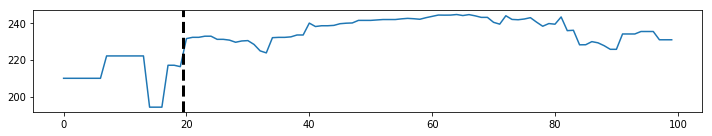

trestbps


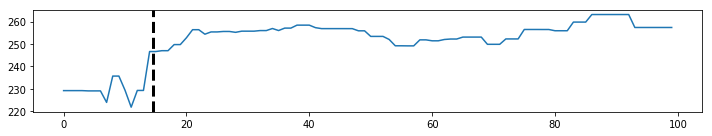

oldpeak


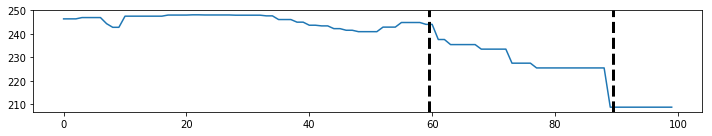

In [143]:
transformed_data = data.copy()
continuous_features = ["thalach", "trestbps", "oldpeak"]
for feature in continuous_features:
    print(feature)
    values, pdp_values = partial_dependency_plot(x_train, catboost_regressor, feature, show_plot=False)
    algo = rpt.Pelt(model="rbf").fit(pdp_values)
    result = algo.predict(pen=10)
    rpt.display(pdp_values, [], result)
    plt.show()
    transformed_data[feature] = pd.cut(data[feature], [values[0]-1] + [values[r - 1] for r in result], include_lowest=True, retbins=False, labels=False)

## Zmienne dyskretne

In [144]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
chol        152
dtype: int64

In [145]:
discrete_features = ["cp", "restecg", "slope", "thal"] # 4, 3, 3, 3

Ze zmiennymi dyskretnymi postąpimy podobnie jak ze zmiennymi ciągłymi, z tym że będziemy starali się po prostu zmniejszyć ich wymiarowość (również na podstawie średniej odpowiedzi modelu).

In [146]:
y_train_pred = catboost_regressor.predict(x_train)
x_train.loc[:, "prediction"] = y_train_pred

In [147]:
for feature in discrete_features:
    kmeans = KMeans(n_clusters=2)
    mean_predictions = x_train.groupby(feature)["prediction"].mean()
    clusters = kmeans.fit_predict(mean_predictions.values.reshape(-1, 1))
    transformed_data[feature] = transformed_data[feature]\
    .map({value: transformed_value for value, transformed_value \
          in zip(mean_predictions.reset_index()[feature], clusters)}).values

In [148]:
transformed_data = transformed_data.dropna()

Dane po przetransformowaniu wyglądają teraz tak:

In [149]:
transformed_data.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,1.0,1,0,1,0,0.0,0,0.0,1,0,233
1,67,1,0,1.0,0,0,1,1,0.0,1,3.0,0,2,286
2,67,1,0,1.0,0,0,1,1,0.0,1,2.0,0,1,229
3,37,1,1,1.0,0,1,1,0,1.0,0,0.0,0,0,250
4,41,0,1,1.0,0,0,1,0,0.0,0,0.0,0,0,204


In [150]:
x_train_transformed, x_test_transformed, y_train_transformed, y_test_transformed\
= train_test_split(transformed_data.drop("chol", axis=1), transformed_data["chol"], random_state=42)
y_train_transformed = y_train_transformed.values
y_test_transformed = y_test_transformed.values

In [151]:
regressor = LinearRegression()
regressor.fit(x_train_transformed, y_train_transformed)
y_pred_transformed = regressor.predict(x_test_transformed)
y_pred_train_transformed = regressor.predict(x_train_transformed)

print("train error:", mean_absolute_error(y_pred_train_transformed, y_train_transformed))
print("test error: ", mean_absolute_error(y_pred_transformed, y_test_transformed))

train error: 36.488271265974184
test error:  36.77209967875099


# Podsumowanie
Modele regresji trenowane były na zbiorze o bardzo małej liczności, wobec tego dobre dopasowanie było trudne do osiągnięcia i złożone modele nie miały takiej przewagi nad zwykłą regresją liniową. Były one jednak dużo bardziej dopasowane do danych treninowych. Posłużenie się zatem modelem o większej wariancji do ekstrakcji cech, które później użyliśmy w prostym modelu regresji liniowej pozwoliło na wyciągnięcie użytecznych cech, nie powodując jednocześnie nadmiernego dopasowania do danych. Model regresji linionwej osiągnął ostatecznie najlepsze wyniki na zbiorze testowym, różnice nie były jednak ogromne.